## 정규 표현식 살펴보기
- 정규 표현식 regular expressions
- reqular :정규의, 정기의, 규칙적인, 보통의, 정례의
- 복잡한 문자열을 처리할 때 사용하는 기법
- 파이썬만의 고유 문법이 아니라 문자열을 처리하는 모든 곳에서 사용하는 일종의 형식 언어이다.
- 정규 표현식은 줄여서 '정규식'이라고도 한다.


5. 정례의

#### 1. 정규표현식(Regular Expression)이란?
정규표현식은 특정한 규칙을 가진 문자열의 집합을 표현하는데 사용하는 형식 언어입니다.
문자열을 처리하는 방법 중의 하나로, 특정한 조건의 문자를 ‘검색’하거나 ‘치환’하는 과정을 매우 간편하게 처리할 수 있도록 해주는 수단입니다.

정규표현식은 간단한 쓰임부터 고급 스킬까지 다양한 사용법이 있는데요.
간단한 사용법만 알아두어도 텍스트 데이터를 다루는데 아주 큰 도움이 될 것입니다.
정규표현식은 SQL부터 스크립트 언어까지 다양한 곳에서 활용할 수 있기 때문이지요.

#### 2. 정규표현식의 ‘패턴(Pattern)’e
정규표현식은 패턴을 사용해서 문자열을 처리합니다.
기본 원리는 위 그림과 같이 대상 문자열에 정규표현식을 적용해서 찾을 문자열을 검색해내는 것입니다.
조건에 맞는 문자열을 찾은 이후 추출 또는 치환할 수 있

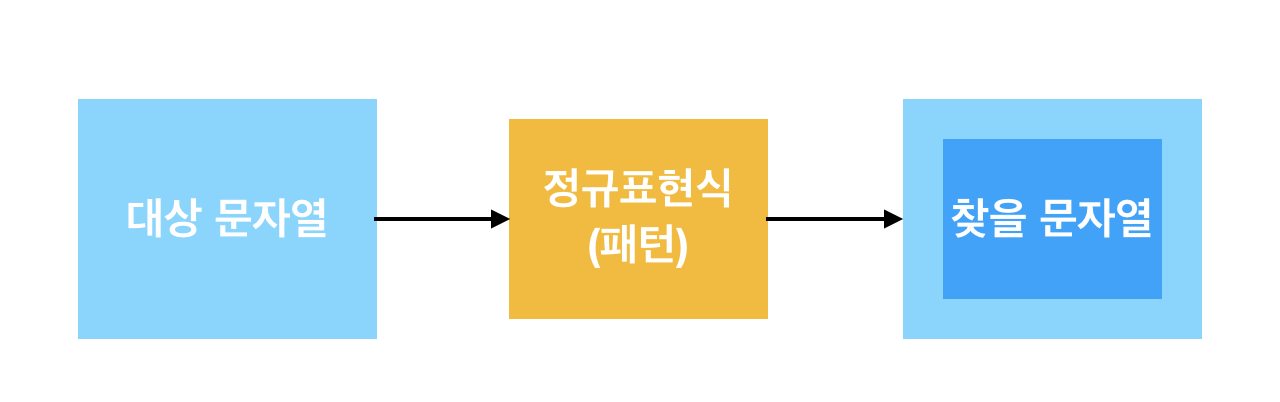습니다.

#### 3. 패턴의 종류

정규표현식 패턴은 종류가 아주 많습니다.
각 패턴을 개별적으로 사용할 수도 있지만 함께 혼합해서 사용할 때 그 효과가 배가 됩니다.<br>


참조[https://yurimkoo.github.io/analytics/2019/10/26/regular_expression.html]

#### 왜 정규 표현식은 왜 필요한가?

#### 문제:
주민등록번호를 포함하고 있는 텍스트가 있다. <br>
이 텍스트에 포함된 모든 주민등록번호의 뒷자리를 '*'로 변경해 보자.

#### 해결절차:1. 전체 텍스트를 공복문자로 나눈다.
2. 나뉜 단어가 주민등록번호 형식인지 조사한다.
3. 단어가 주민등록번호 형식이라면 뒷자리를 '*'로 변환한다.
4. 나뉜 단어를 다시 조립한다.자.

In [43]:
data = """
park 802021-1478458
kim  700905-1012569
"""

result =[]

for line in data.split('\n'):
    word_result = []
    # i +=1
    for word in line.split(" "):
        # print(i, word, len(word), word[:6].isdigit() , word[7:].isdigit())        
        if len(word) == 14 and word[:6].isdigit() and word[7:].isdigit():
            word = word[:6] + '-' + '*******'
            
        word_result.append(word)

    result.append(" ".join(word_result))

print('\n'.join(result))



park 802021-*******
kim  700905-*******



In [35]:
result

['', 'park 802021-*******', 'kim  700905-*******', '']

In [51]:
import re

data = """
park 802021-1478458
kim  700905-1012569
"""

# pat = re.compile(r"(\d{6}[-]\d{7})")
# print(pat.sub("\g<1>-*******", data))

pat = re.compile(r"(\d{6})[-]\d{7}")
print(pat.sub("\g<1>-*******", data))


park 802021-*******
kim  700905-*******



<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\g'
C:\Users\kjink007\AppData\Local\Temp\ipykernel_2476\2382162893.py:12: SyntaxWarning: invalid escape sequence '\g'
  print(pat.sub("\g<1>-*******", data))


In [49]:
import re

data = """
park 802021-1478458
kim  700905-1012569
"""

# pat = re.compile(r"(\d{6}[-]\d{7})")
# print(pat.sub("\g<1>-*******", data))

pat = re.compile("(\\d{6})[-]\\d{7}")
print(pat.sub("\\g<1>-*******", data))



park 802021-*******
kim  700905-*******



In [53]:
import re

data = """
park 802021-1478458
kim  700905-1012569
"""

# pat = re.compile(r"(\d{6}[-]\d{7})")
# print(pat.sub("\g<1>-*******", data))

pat = re.compile(r"(?P<firstNum>\d{6})[-]\d{7}")
print(pat.sub(r"\g<1>-*******", data))


park 802021-*******
kim  700905-*******



In [215]:
import re

data = """
park 802021-1478458
kim  700905-1012569
"""

pat = re.compile(r"([-]\d{7})", re.MULTILINE)
p = pat.findall(data)
print(p)
p = pat.sub('-*******', data)
print(p)

['-1478458', '-1012569']

park 802021-*******
kim  700905-*******

